# Open Problem

In [43]:
import pandas as pd
from datetime import datetime
df = pd.read_csv("Uber Request Data.csv")
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [44]:
df[["Request timestamp","Drop timestamp"]].head(20)

,Request timestamp,Drop timestamp
0,11/7/2016 11:51,11/7/2016 13:00
1,11/7/2016 17:57,11/7/2016 18:47
2,12/7/2016 9:17,12/7/2016 9:58
3,12/7/2016 21:08,12/7/2016 22:03
4,13-07-2016 08:33:16,13-07-2016 09:25:47
5,13-07-2016 21:57:28,13-07-2016 22:28:59
6,14-07-2016 06:15:32,14-07-2016 07:13:15
7,15-07-2016 05:11:52,15-07-2016 06:07:52
8,15-07-2016 17:57:27,15-07-2016 18:50:51
9,11/7/2016 6:46,11/7/2016 7:25


In [45]:
def convert_time(x):
    x = str(x)
    if len(x) in [15.0,14.0]:
        x = datetime.strptime(x,"%d/%m/%Y %H:%M")
    elif len(x) in [19.0]:
        x = datetime.strptime(x,"%d-%m-%Y %H:%M:%S")
    else:
        x = None
    x = pd.to_datetime(x)
    return x

In [46]:
df["Drop timestamp"] = df["Drop timestamp"].apply(convert_time)
df["Request timestamp"] = df["Request timestamp"].apply(convert_time)

In [47]:
df["Request timestamp"].dtype, df["Drop timestamp"].dtype

(dtype('<M8[ns]'), dtype('<M8[ns]'))

In [51]:
# Add these 4 columns for year and month and ensure they are of Integer format
df["RequestYear"] = pd.to_datetime(df["Request timestamp"]).dt.year
df["RequestMonth"] = pd.to_datetime(df["Request timestamp"]).dt.month

df["DropYear"] = pd.to_datetime(df["Drop timestamp"]).dt.year.astype("Int64")
df["DropMonth"] = pd.to_datetime(df["Drop timestamp"]).dt.month.astype("Int64")

# problem number 1

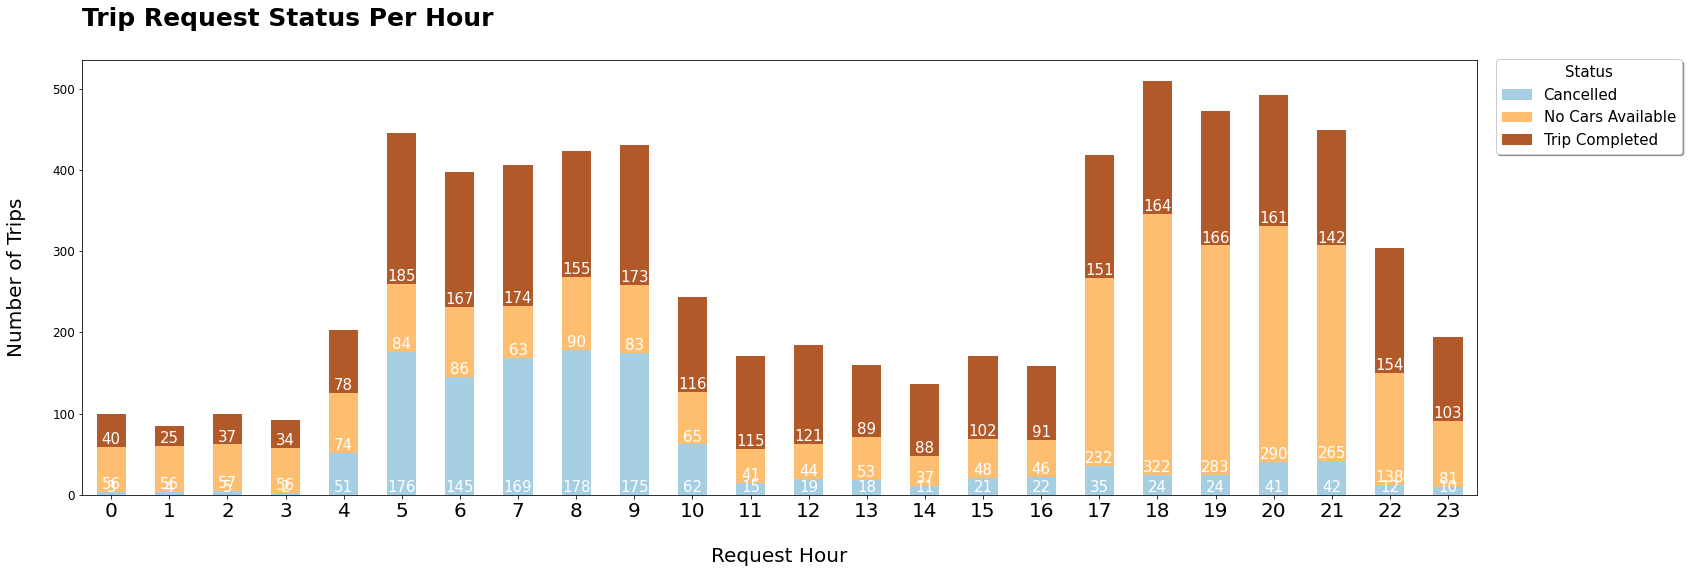

In [49]:
res = hourly_requests_vs_status.plot(kind="bar",stacked=True,figsize=[25,8],colormap="Paired",fontsize=12)
plt.title("Trip Request Status Per Hour\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("\nRequest Hour",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20,rotation=0)
plt.ylabel("Number of Trips\n",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20)
lgd = plt.legend(title='Status',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.08, 1.019), shadow=True, ncol=1, labels=["Cancelled","No Cars Available","Trip Completed"],fontsize=15)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=15,color="w")
plt.savefig("15 - Trip Requests Status per Hour.jpeg",dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

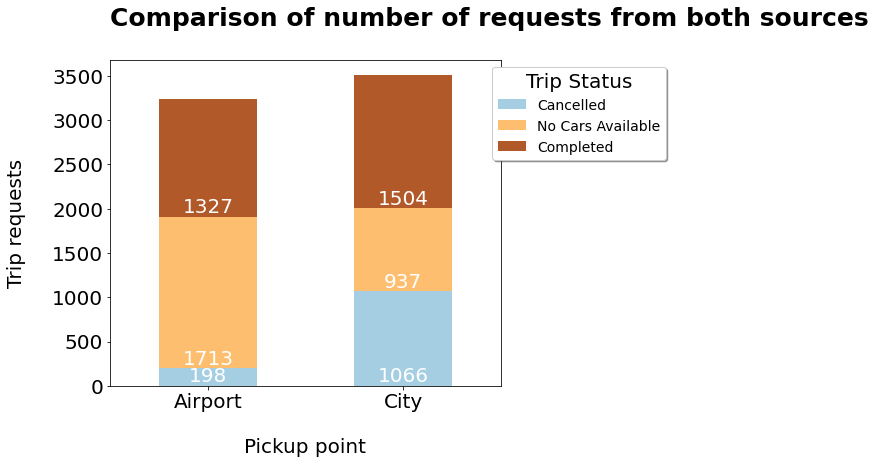

In [101]:
import matplotlib.pyplot as plt
pickup_vs_status = pd.pivot_table(data=df,index="Pickup point",columns="Status",values="Request id",aggfunc="count")
# Comparison of number of requests from both sources (Airport and City)
res = pickup_vs_status.plot(kind='bar', stacked=True,figsize=[7,6],colormap="Paired",fontsize=20)
plt.title("Comparison of number of requests from both sources\n",fontsize=25,loc="left",fontweight="bold")

plt.xlabel("\nPickup point",fontsize=20)
plt.setp( res.xaxis.get_majorticklabels(), rotation=0,fontsize=20)
plt.ylabel("Trip requests\n",fontsize=20)
plt.setp( res.yaxis.get_majorticklabels(), rotation=0,fontsize=20)
lgd = plt.legend(title='Trip Status',title_fontsize=20,loc='upper center', bbox_to_anchor=(1.2, 1), shadow=True, ncol=1, labels=['Cancelled', 'No Cars Available', 'Completed'],fontsize=14)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=20,color='w')
plt.savefig("01 - Comparison of number of requests from both sources.jpeg",dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [89]:
df["RequestHour"] = pd.to_datetime(df["Request timestamp"]).dt.hour

In [90]:
hourly_requests_vs_pickup = pd.pivot_table(data=df,index=["RequestHour"],columns=["Pickup point"],values="Request id",aggfunc="count")
hourly_requests_vs_pickup.head()

Pickup point,Airport,City
RequestHour,,
0,53,46
1,42,43
2,41,58
3,45,47
4,72,131


In [91]:
# Let's create pivot table for all completed trips from Airport or City per hour
trip_completed = pd.pivot_table(data=df[df.Status=="Trip Completed"],index=["RequestHour"],columns=["Status","Pickup point"],values="Request id",aggfunc="count")

In [80]:
df["RequestTime"] = pd.to_datetime(df["Request timestamp"]).dt.time

# Problem 2

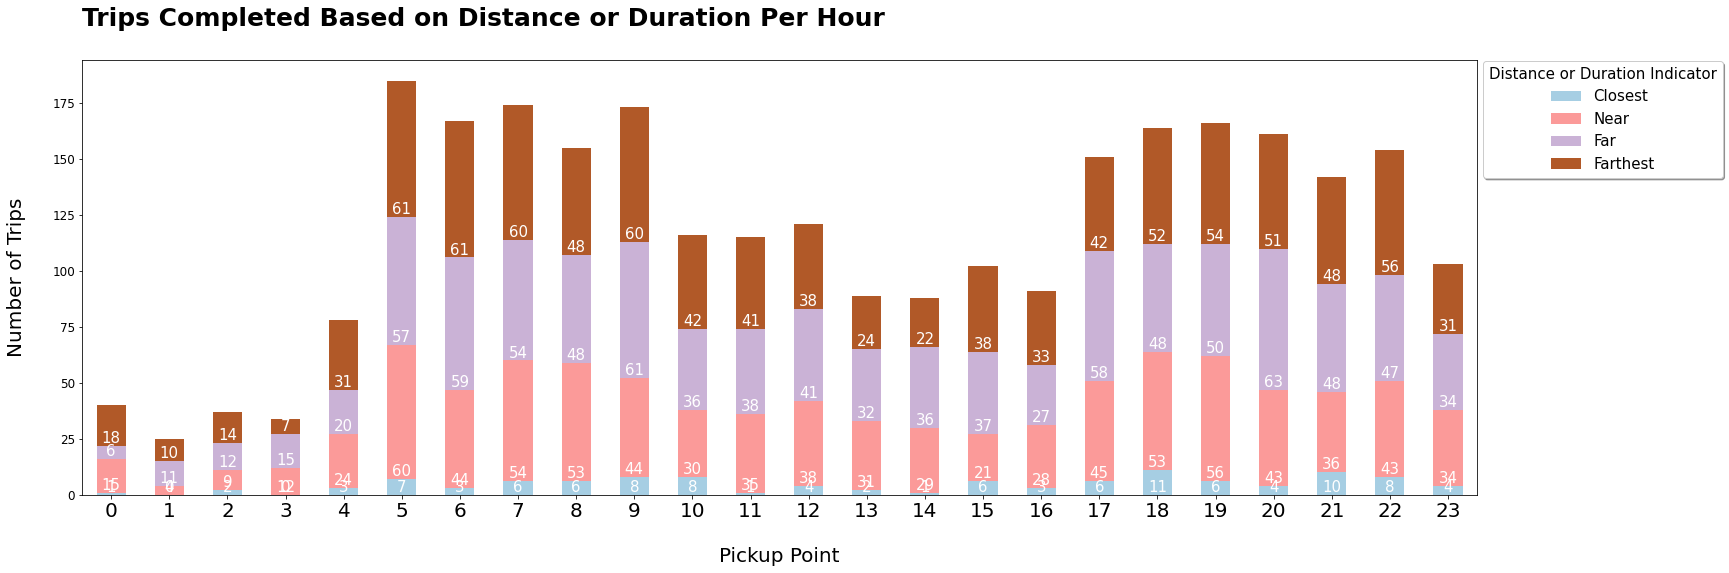

In [114]:
# Now lets create a pivot table to see the number of completed trips from Airport and City and see how many of these fall in each Duration/Distance bucket and do this per hour
res = pd.pivot_table(data=df[~df.Duration.isna()],index="RequestHour",columns="DistanceEstimator",values="Request id",aggfunc="count").plot(kind="bar",figsize=[25,8],stacked=True,colormap="Paired",fontsize=12)
plt.title("Trips Completed Based on Distance or Duration Per Hour\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("\nPickup Point",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20,rotation=0)
plt.ylabel("Number of Trips\n",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20)
lgd = plt.legend(title='Distance or Duration Indicator',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.09, 1.015), shadow=True, ncol=1, labels=["Closest","Near","Far","Farthest"],fontsize=15)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=15,color="w")
plt.savefig("17 - Trips Completed Based on Distance or Duration Per Hour.jpeg",dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [81]:
import datetime
df["TimePeriod"] = pd.NA
df["TimePeriod"][df["RequestTime"].between(datetime.time(4,0,0), datetime.time(6,59,59), inclusive = True) == True] = "01 Early Morning"
df["TimePeriod"][df["RequestTime"].between(datetime.time(7,0,0), datetime.time(11,59,59), inclusive = True) == True] = "02 Morning"
df["TimePeriod"][df["RequestTime"].between(datetime.time(12,0,0), datetime.time(15,59,59), inclusive = True) == True] = "03 Afternoon"
df["TimePeriod"][df["RequestTime"].between(datetime.time(16,0,0), datetime.time(17,59,59), inclusive = True) == True] = "04 Early Evening"
df["TimePeriod"][df["RequestTime"].between(datetime.time(18,0,0), datetime.time(19,59,59), inclusive = True) == True] = "05 Evening"
df["TimePeriod"][df["RequestTime"].between(datetime.time(20,0,0), datetime.time(23,59,59), inclusive = True) == True] = "06 Night"
df["TimePeriod"][df["RequestTime"].between(datetime.time(0,0,0), datetime.time(3,59,59), inclusive = True) == True] = "07 Late Night"
df.head()

C:\Users\USER\AppData\Local\Temp/ipykernel_2232/1898735625.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df["TimePeriod"][df["RequestTime"].between(datetime.time(4,0,0), datetime.time(6,59,59), inclusive = True) == True] = "01 Early Morning"
C:\Users\USER\AppData\Local\Temp/ipykernel_2232/1898735625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TimePeriod"][df["RequestTime"].between(datetime.time(4,0,0), datetime.time(6,59,59), inclusive = True) == True] = "01 Early Morning"
C:\Users\USER\AppData\Local\Temp/ipykernel_2232/1898735625.py:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df["TimePeriod"][df["RequestTime"].between(datetime.time(7,0,0), datetime.time(11,

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestYear,RequestMonth,DropYear,DropMonth,DistanceEstimator,Duration,RequestTime,TimePeriod
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016,7,2016,7,<NA>,69.0,11:51:00,02 Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016,7,2016,7,<NA>,50.0,17:57:00,04 Early Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016,7,2016,7,<NA>,41.0,09:17:00,02 Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016,7,2016,7,<NA>,55.0,21:08:00,06 Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,2016,7,<NA>,52.516667,08:33:16,02 Morning


In [100]:
hourly_requests_vs_status = pd.pivot_table(data=df,index=["RequestHour"],columns=["Status"],values="Request id",aggfunc="count")
hourly_requests_vs_status.head()

Status,Cancelled,No Cars Available,Trip Completed
RequestHour,,,
0,3,56,40
1,4,56,25
2,5,57,37
3,2,56,34
4,51,74,78


In [106]:
pd.pivot_table(data=df,index="Pickup point",columns="DistanceEstimator",values="Request id",aggfunc="count")

DistanceEstimator,01 Closest,02 Near,03 Far,04 Farthest
Pickup point,,,,
Airport,49,409,436,433
City,61,432,502,509


In [104]:
df["DistanceEstimator"].value_counts(dropna=False)

NaN    6745
Name: DistanceEstimator, dtype: int64

In [105]:
# Add now lets create the buckets.
df["DistanceEstimator"][df.Duration<30] = "01 Closest"
df["DistanceEstimator"][(df.Duration>=30) & (df.Duration<45)] = "02 Near"
df["DistanceEstimator"][(df.Duration>=45) & (df.Duration<60)] = "03 Far"
df["DistanceEstimator"][(df.Duration>=60)] = "04 Farthest"

C:\Users\USER\AppData\Local\Temp/ipykernel_2232/3824271471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DistanceEstimator"][df.Duration<30] = "01 Closest"
C:\Users\USER\AppData\Local\Temp/ipykernel_2232/3824271471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DistanceEstimator"][(df.Duration>=30) & (df.Duration<45)] = "02 Near"
C:\Users\USER\AppData\Local\Temp/ipykernel_2232/3824271471.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

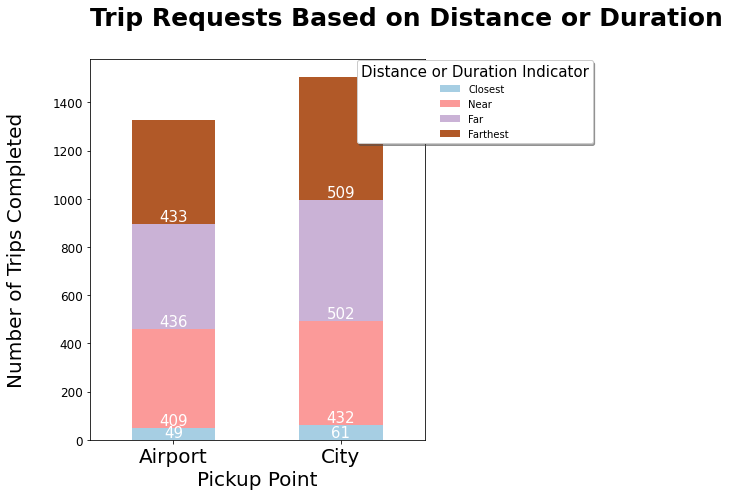

In [121]:
# Now lets create a bar chart to see the number of completed trips from Airport and City and see how many of these fall in each Duration/Distance bucket
res = pd.pivot_table(data=df,index="Pickup point",columns="DistanceEstimator",values="Request id",aggfunc="count").plot(kind="bar",figsize=[6,7],stacked=True,colormap="Paired",fontsize=12)
plt.title("Trip Requests Based on Distance or Duration\n",fontsize=25,fontweight="bold",loc="left")
plt.xlabel("Pickup Point",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20,rotation=0)
plt.ylabel("Number of Trips Completed\n",fontsize=20)
plt.setp(res.xaxis.get_majorticklabels(),fontsize=20)
lgd = plt.legend(title='Distance or Duration Indicator',title_fontsize=15,loc='upper center', bbox_to_anchor=(1.15, 1.01), shadow=True, ncol=1, labels=["Closest","Near","Far","Farthest"],fontsize=10)
for p in res.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    res.text(x+width/2,
             (y),
             '{:.0f}'.format(height),
             horizontalalignment='center',
             verticalalignment='bottom',fontsize=15,color="w")
plt.savefig("16 - Trip Requests Based on Distance or Duration.jpeg",dpi=400,bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()